In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import HashingVectorizer
import itertools

In [2]:
#Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [6]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [7]:
train.dropna(inplace=True)

In [8]:
test.dropna(inplace=True)

In [9]:
test.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [10]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
train.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [12]:
#train.drop(['id', 'text', 'author'],axis=1, inplace=True)
#test.drop(['id', 'text', 'author'],axis=1, inplace=True)
train.drop(['id', 'title', 'author'],axis=1, inplace=True)
test.drop(['id', 'title', 'author'],axis=1, inplace=True)

In [13]:
train.columns

Index(['text', 'label'], dtype='object')

In [14]:
test.columns

Index(['text'], dtype='object')

In [15]:
#Splitting data
#X_train, X_test, y_train, y_test = train_test_split(train['title'],train['label'], test_size=0.33, random_state=53)
X_train, X_test, y_train, y_test = train_test_split(train['text'],train['label'], test_size=0.33, random_state=53)


# Building the Count and Tfidf Vectors


In [16]:

# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train)                  # Learn the vocabulary dictionary and return term-document matrix.

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)    # This removes words which appear in more than 70% of the articles

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Get the feature names of `tfidf_vectorizer` 
#print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
#print(count_vectorizer.get_feature_names()[:10])

count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

difference = set(count_df.columns) - set(tfidf_df.columns)

print(difference)

set()


In [17]:
# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


False


In [18]:

print(count_df.head())

print(tfidf_df.head())

   00  000  0000  000035  0001  0002  000202  000205  0002062  000billion  \
0   0    0     0       0     0     0       0       0        0           0   
1   0    0     0       0     0     0       0       0        0           0   
2   0    1     0       0     0     0       0       0        0           0   
3   0    0     0       0     0     0       0       0        0           0   
4   0    0     0       0     0     0       0       0        0           0   

   ...  不動心  中文  初心  山崎  残心  点击查看本文中文版  無心  無為  ﬁnds  ｓꮭ  
0  ...    0   0   0   0   0          0   0   0     0   0  
1  ...    0   0   0   0   0          0   0   0     0   0  
2  ...    0   0   0   0   0          0   0   0     0   0  
3  ...    0   0   0   0   0          0   0   0     0   0  
4  ...    0   0   0   0   0          0   0   0     0   0  

[5 rows x 133963 columns]
    00       000  0000  000035  0001  0002  000202  000205  0002062  \
0  0.0  0.000000   0.0     0.0   0.0   0.0     0.0     0.0      0.0   
1  0.0  0.0000

# Function to plot the confusion matrix 


In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#  Multinomial Naive bayes 

accuracy:   0.767
Confusion matrix, without normalization
[[3403    6]
 [1402 1224]]


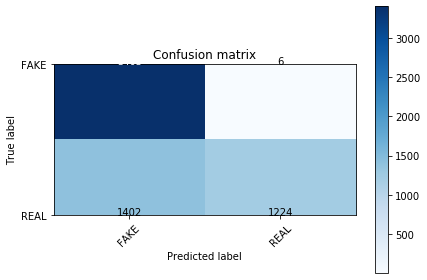

In [20]:
clf = MultinomialNB() 

clf.fit(tfidf_train, y_train)                       # Fit Naive Bayes classifier according to X, y

pred = clf.predict(tfidf_test)                     # Perform classification on an array of test vectors X.
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)

accuracy:   0.910
Confusion matrix, without normalization
[[3279  130]
 [ 413 2213]]


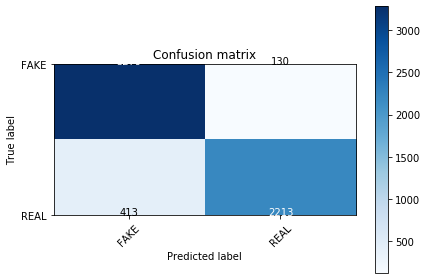

In [21]:
clf = MultinomialNB()

clf.fit(count_train, y_train)

pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)

# Applying Passive Aggressive Classifier


accuracy:   0.959
Confusion matrix, without normalization
[[3293  116]
 [ 129 2497]]
Alpha: 0.00 Score: 0.87970
Alpha: 0.10 Score: 0.90273


C:\Users\Yshika\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.20 Score: 0.88186
Alpha: 0.30 Score: 0.86263
Alpha: 0.40 Score: 0.84640
Alpha: 0.50 Score: 0.82717
Alpha: 0.60 Score: 0.81425
Alpha: 0.70 Score: 0.80182
Alpha: 0.80 Score: 0.78873
Alpha: 0.90 Score: 0.77780
0 -8.444768223008053 breitbart
0 -6.6392552930197155 said
0 -6.350740707540309 follow
0 -6.140450081176586 twitter
0 -5.9981595840363875 2017
0 -4.886753551867596 ms
0 -4.756045311865763 mr
0 -3.3575628778618234 march
0 -3.179102543053851 mrs
0 -2.7516817042061765 dr
0 -2.7181390156648404 milo
0 -2.5394280148403525 islamic
0 -2.539218486728292 sunday
0 -2.52870608843758 ap
0 -2.527856927650686 president
0 -2.5090539764583335 added
0 -2.313897409655389 macron
0 -2.3129717931188023 monday
0 -2.1878128510762136 _____
0 -2.1660988727310104 executive
0 -2.117799438421446 january
0 -2.116677755184201 pamkeynen
0 -2.1029866763317915 cent
0 -2.0873887994405673 percent
0 -2.0861603988197692 democrats
0 -2.081683947370377 decision
0 -2.076171527159119 united
0 -2.066187277479177 till

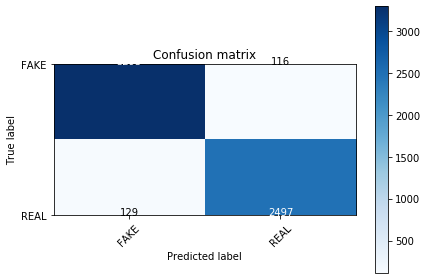

In [22]:
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)


clf = MultinomialNB(alpha=0.1)               # Additive (Laplace/Lidstone) smoothing parameter

last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))


def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):       # inspect the top 30 vectors for fake and real news

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()                                            # Array mapping from feature integer indices to feature name
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)
feature_names = tfidf_vectorizer.get_feature_names()

### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]                               # clearly there are certain words which might show political intent and source in the top fake features (such as the words corporate and establishment).

tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))
#print(tokens_with_weights)


accuracy:   0.778
Confusion matrix, without normalization
[[3402    7]
 [1334 1292]]


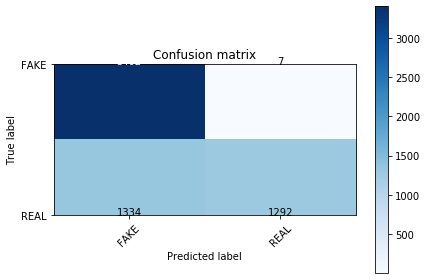

In [23]:
lf = MultinomialNB(alpha=.01)

clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)

accuracy:   0.959
Confusion matrix, without normalization
[[3295  114]
 [ 131 2495]]


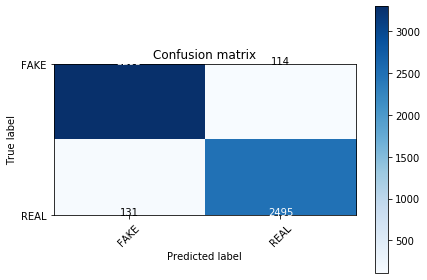

In [24]:
clf = PassiveAggressiveClassifier()    

clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)